# Prueba de predicción de _score_ de películas

**David Torres Pascual**

In [1]:
# Librerías de Análisis de datos
import pandas as pd
import numpy as np

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

# Librerías de Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

## Cargamos los datos y exploramos los mismos

En un primer momento cargamos los datos y vemos algunos aspectos importantes de los mismos: descripción de medias, máximos, míminos; tipos de las variables...

In [2]:
url = 'movie_metadata.csv'

df = pd.read_csv(url,
                  sep=',',
                  encoding='utf-8')

df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [3]:
print(df.shape)
df.dtypes

(5043, 28)


color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [4]:
df.describe()

C:\Users\david\Documents\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,8.593500e+03,1411.000000,NaN,NaN,NaN,NaN,NaN,5.800000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.435900e+04,3090.000000,NaN,NaN,NaN,NaN,NaN,6.600000,NaN,166.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,9.630900e+04,13756.500000,NaN,NaN,NaN,NaN,NaN,7.200000,NaN,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


Eliminamos los valores nulos. Podríamos haber realizado algún tipo de imputación de esos valores, pero requeriría más tiempo y comprobar si implica mejora en los resultados.

In [5]:
df = df.dropna(axis=0)

df.shape

(3756, 28)

## Filtrado de variables numéricas, strings...

Separamos las variables numéricas de las que tienen valores de texto y, con las últimas, aprovechamos aquellas que podemos convertir fácilmente en valores numéricos con funciones sencillas.

In [6]:
df_num = df.select_dtypes(include=['float64','int64'])
df_num.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [7]:
y = df_num['imdb_score']

X = df_num.drop('imdb_score', 1)

In [8]:
X.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,2.35,0


Los valores numéricos deben transformarse a una escala compartida, por lo que usamos el método correspondiente de la librería.

In [9]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)
X_std.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,4.501308,2.991649,-0.263168,0.044203,-0.435085,10.068384,5.133549,-0.350064,-0.674709,6.608312,0.844159,0.60924,-0.238931,-0.937662,1.101870
1,1.090623,2.594188,-0.079646,0.120761,2.078243,3.652351,2.403663,1.925921,-0.674709,2.191675,1.122944,0.40695,0.655375,0.676973,-0.435872


In [10]:
df_str0 = df.select_dtypes(include=['object'])

In [11]:
df_str1 = df_str0[['color','language','country', 'content_rating']]
df_str1.head(2)

,color,language,country,content_rating
0,Color,English,USA,PG-13
1,Color,English,USA,PG-13


In [12]:
df_str2 = pd.DataFrame()

df_str2['content_rating'] = df_str1['content_rating'].str.extract('(\d+)', expand=False).astype(float)
df_str2['color'] = df_str1['color'].apply(lambda x: 1 if x == 'Color' else 0)
df_str2['country'] = df_str1['country'].apply(lambda x: 1 if x == 'USA' else 0)
df_str2['language'] = df_str1['language'].apply(lambda x: 1 if x == 'English' else 0)

df_str2 = df_str2.fillna(0)
df_str2 = df_str2.reset_index(range(len(df_str2)))
print(df_str2.shape)
df_str2.head(2)

(3756, 5)


,index,content_rating,color,country,language
0,0,13.0,1,1,1
1,1,13.0,1,1,1


## Unimos los datos y vemos las correlaciones

In [13]:
X_std = X_std.reset_index(range(len(X_std)))

X_std = pd.concat([X_std, df_str2], axis=1, join_axes=[df_str2.index])

print(X_std.shape, y.shape)

X_std.describe()

(3756, 21) (3756,)


,index,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,index,content_rating,color,country,language
count,3756.000000,3.756000e+03,3.756000e+03,3.756000e+03,3.756000e+03,3.756000e+03,3.756000e+03,3.756000e+03,3.756000e+03,3.756000e+03,...,3.756000e+03,3.756000e+03,3.756000e+03,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,1877.500000,-7.513810e-17,-2.246192e-15,-9.931708e-16,8.778920e-17,8.812913e-16,-7.391732e-16,-6.411272e-17,3.136173e-17,3.086515e-16,...,3.570316e-16,-7.162771e-15,-3.541274e-16,3.429129e-15,-2.714948e-15,2139.449414,4.554313,0.966986,0.795261,0.957934
std,1084.408133,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,...,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1345.761978,6.211538,0.178696,0.403565,0.200767
min,0.000000,-1.339794e+00,-3.235248e+00,-2.631678e-01,-4.072231e-01,-4.995297e-01,-7.483115e-01,-6.955605e-01,-6.028935e-01,-6.747093e-01,...,-2.046048e-01,-7.684654e+00,-4.449034e-01,-2.637278e+00,-4.358721e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,938.750000,-7.321901e-01,-6.296668e-01,-2.595821e-01,-3.047942e-01,-4.515187e-01,-6.306860e-01,-5.667838e-01,-5.024863e-01,-6.747093e-01,...,-1.603541e-01,-4.022104e-01,-3.602369e-01,-7.393736e-01,-4.358721e-01,989.750000,0.000000,1.000000,1.000000,1.000000
50%,1877.500000,-2.339546e-01,-1.880429e-01,-2.423057e-01,-1.770222e-01,-4.350854e-01,-3.202986e-01,-3.411057e-01,-3.905725e-01,-1.848179e-01,...,-9.397659e-02,1.035148e-01,-2.940552e-01,6.769729e-01,-4.252943e-01,2033.500000,0.000000,1.000000,1.000000,1.000000
75%,2816.250000,4.587143e-01,4.302306e-01,-1.865648e-01,-4.238630e-02,3.382464e-01,2.029501e-01,1.498223e-01,2.464952e-01,3.050735e-01,...,1.665257e-02,7.103851e-01,-2.301290e-01,6.769729e-01,7.670868e-02,3163.250000,13.000000,1.000000,1.000000,1.000000
max,3755.000000,5.230433e+00,9.704333e+00,7.234151e+00,1.173640e+01,4.074483e+01,1.006838e+01,1.041960e+01,3.374557e+01,2.039062e+01,...,5.385102e+01,1.317255e+00,2.970273e+01,3.934323e+01,1.582692e+01,5042.000000,17.000000,1.000000,1.000000,1.000000


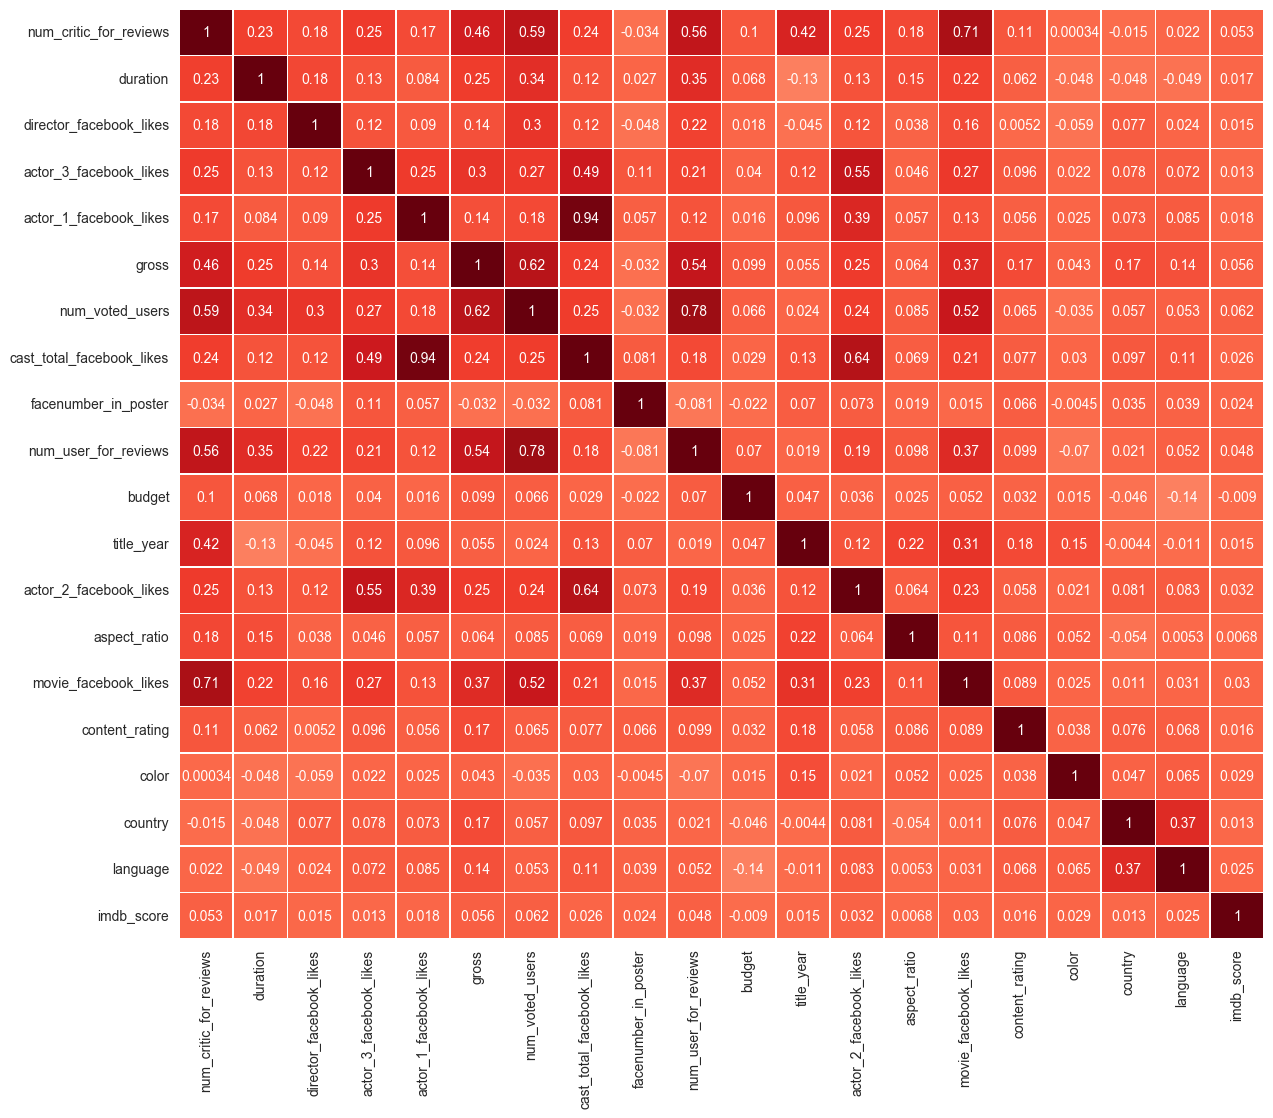

In [14]:
datos = pd.concat([X_std, y], axis=1, join_axes=[X_std.index])
del datos['index']
corr = datos.corr()

plt.figure(figsize=(14,12))
ax = sns.heatmap(corr, 
                 annot=True, 
                 linewidths=.5, 
                 cmap='Reds', 
                 cbar=False)

Como se puede apreciar, nuestra **y** apenas tiene correlación con el resto de variables.

## Machine Learning

+ Primero dividimos entre conjunto de entrenamiento y conjunto de test. Hubiera sido recomendable aplicar validación cruzada a los datos, pero de nuevo lo he descartado por temas de tiempo.

+ Aplicación de un conjunto de árboles (Gradient Boosting) a los datos y dibujo de los resultados y principales atributos.

In [15]:
random_state = 40

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = .25, random_state = random_state)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(2817, 21) (939, 21) (2817,) (939,)


In [16]:
ens = ensemble.GradientBoostingRegressor(alpha=.1,
                                n_estimators=250, max_depth=5,
                                learning_rate=.09, min_samples_leaf=5,
                                min_samples_split=5, random_state=random_state)
ens.fit(X_train, y_train) 
yPred = ens.predict(X_test)
MSE = mean_squared_error(y_test, yPred)
MSE

0.41870190970346555

(-1, 21)

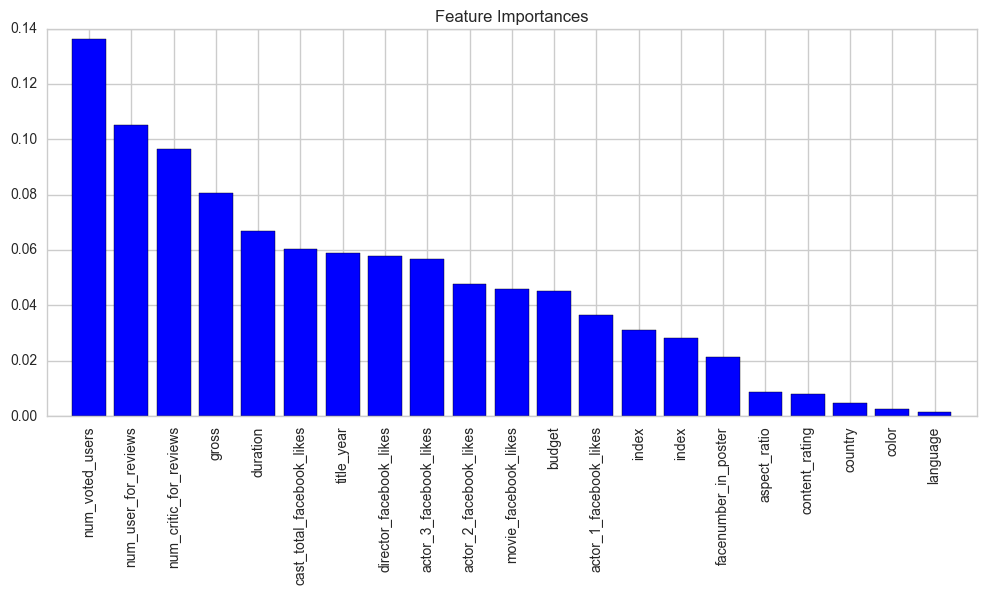

In [17]:
importances = ens.feature_importances_
indices = np.argsort(importances)[::-1]
xc = X_std.columns

plt.figure( figsize = (12, 5) )
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='blue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           xc[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])

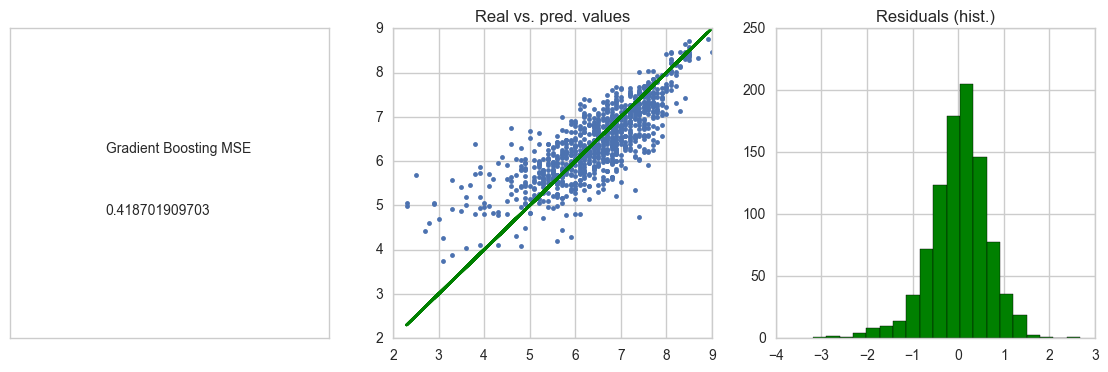

In [23]:
plt.figure( figsize = (14, 28) )

plt.subplot(6, 3, 1)
plt.text(.3,.6,'Gradient Boosting MSE')
plt.text(.3,.4, MSE)
plt.xticks(())
plt.yticks(())
plt.subplot(6, 3, 2)
plt.plot(y_test, yPred, '.', y_test, y_test, 'green', linewidth=2.0)
plt.title('Real vs. pred. values')
plt.subplot(6, 3, 3)
plt.hist(y_test-yPred, color='green', bins=20)
plt.title('Residuals (hist.)')